# 2017 Ford GoBike Analysis

Ford GoBike is a public bicycle sharing system located in San Francisco, California. They launched in June of 2017 and they have over 2,600 bicycles and 262 stations across San Francisco. These bikes can be unlocked from one station and returned to another station in the city. The bikes are available 24/7 all year long and riders can be subscribers or one-time customers.

### What is the structure of your dataset?

This data is structured by date and features 15 columns.

### What is/are the main feature(s) of interest in your dataset?

My main feature of interest with this dataset is the difference between user types (customer or subscriber) when it comes to age, trip duration, the most popular days of the week, and most popular hours of the day to ride. First, I want to know how many customers there are compared to subscribers. Then I want to figure out which days are most popular for riding for customers and subscribers as well as the most popular hours of the day. Then I want to find out the average age of the riders and how that relates to popular days and hours. Then I want to look at the trip duration difference between user types and age.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that can support my investigation would be the user types, the member age, the most popular days of the week, the most popular hours of the day, and the trip durations.

### Preliminary Wrangling
This dataset includes Ford GoBike's trip data from June 2017 to December 2017.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sb

%matplotlib inline

### Assessing Data

In [2]:
# Load the dataset
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# See how many values there are
df.shape

(519700, 15)

In [5]:
# View info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [6]:
# Look at the first records
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [7]:
# Look at the last records
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,1991.0,Male
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,1973.0,Male
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,1985.0,Female
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,1981.0,Male
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,1984.0,Male


In [8]:
# Check if there are any duplicates
df.duplicated().sum()

0

In [9]:
# Look at the descriptive statistics of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


There was a lot of information to assess before cleaning. There are many records to pull data from so we should have a pretty good amount to look at and to ask questions about. There is some cleaning to do first though so that is our next step.

### Quality Issues
These are issues that need to be fixed in order to have a tidy dataset to look at.
1. Fix timestamps, they are objects
2. user_type, gender can be changed to category
3. bike_id, start_station_id, end_station_id can be changed to object
4. Calculate ages of user, get rid of outliers, and change to int
5. Compute month, day, hour, weekday
6. Drop unneccessary columms



In [10]:
# Create a copy
df_clean = df.copy()

#### Define
Fix timestamps, they are objects.

#### Code

In [11]:
# Set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

#### Test

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 59.5+ MB


#### Define
User_type and member_gender can be changed to category.

#### Code

In [41]:
# Change user type and gender to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')

#### Test

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null category
member_birth_year          453159 non-null float64
member_gender              453238 non-null category
dtypes: category(2), datetime64[ns](2), float64(5), int64(4), object(2)
memory usage: 52.5+ MB


#### Define
Bike_id, start_station_id, end_station_id can be changed to object.

#### Code

In [15]:
# Change bike id, start station id, and end station id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

#### Test

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
member_birth_year          453159 non-null float64
member_gender              453238 non-null category
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 52.5+ MB


#### Define
Calculate ages of user, get rid of outliers, and change to int.

#### Code

In [17]:
# Subtract the member birth year from the year of the dataset
df_clean['member_age'] = 2017-df_clean['member_birth_year']

In [18]:
# Get rid of outliers
df_clean = df_clean.query('member_age <=70')

In [19]:
# Change member age and birth year to int
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

#### Test

In [20]:
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
197246,250,2017-10-27 09:55:45.417,2017-10-27 09:59:56.126,28,The Embarcadero at Bryant St,37.787168,-122.388098,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,2836,Subscriber,1967,Female,50
473240,1586,2017-07-31 18:26:19.311,2017-07-31 18:52:45.886,184,Franklin St at 14th St,37.803765,-122.269988,197,El Embarcadero at Grand Ave,37.808848,-122.249680,656,Subscriber,1968,Male,49
107543,959,2017-11-23 14:32:15.953,2017-11-23 14:48:15.654,196,Grand Ave at Perkins St,37.808894,-122.256460,196,Grand Ave at Perkins St,37.808894,-122.256460,1196,Subscriber,1988,Female,29
141306,1683,2017-11-12 15:36:04.739,2017-11-12 16:04:08.612,33,Golden Gate Ave at Hyde St,37.781650,-122.415408,6,The Embarcadero at Sansome St,37.804770,-122.403234,2964,Subscriber,1994,Male,23
18181,315,2017-12-20 17:39:43.402,2017-12-20 17:44:58.988,182,19th Street BART Station,37.809013,-122.268247,164,Isabella St at San Pablo Ave,37.814988,-122.274844,36,Subscriber,1978,Male,39
236414,422,2017-10-16 23:59:58.779,2017-10-17 00:07:01.077,112,Harrison St at 17th St,37.763847,-122.413004,127,Valencia St at 21st St,37.756708,-122.421025,525,Subscriber,1994,Male,23
38663,507,2017-12-14 12:03:31.032,2017-12-14 12:11:58.221,66,3rd St at Townsend St,37.778742,-122.392741,22,Howard St at Beale St,37.789756,-122.394643,69,Subscriber,1969,Male,48
83176,616,2017-12-01 18:07:09.983,2017-12-01 18:17:26.322,324,Union Square (Powell St at Post St),37.788300,-122.408531,26,1st St at Folsom St,37.787290,-122.394380,2118,Subscriber,1982,Female,35
297884,423,2017-09-28 18:32:23.150,2017-09-28 18:39:26.505,197,El Embarcadero at Grand Ave,37.808848,-122.249680,200,2nd Ave at E 18th St,37.800214,-122.253810,2083,Subscriber,1960,Female,57
343857,592,2017-09-15 16:05:56.239,2017-09-15 16:15:48.920,22,Howard St at Beale St,37.789756,-122.394643,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2098,Subscriber,1979,Male,38


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451472 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               451472 non-null int64
start_time                 451472 non-null datetime64[ns]
end_time                   451472 non-null datetime64[ns]
start_station_id           451472 non-null object
start_station_name         451472 non-null object
start_station_latitude     451472 non-null float64
start_station_longitude    451472 non-null float64
end_station_id             451472 non-null object
end_station_name           451472 non-null object
end_station_latitude       451472 non-null float64
end_station_longitude      451472 non-null float64
bike_id                    451472 non-null object
user_type                  451472 non-null category
member_birth_year          451472 non-null int64
member_gender              451472 non-null category
member_age                 451472 non-null int64
dtypes: category(2), datetime64[ns](2), float64(4), int64(3), object

#### Define
Compute month, day, hour, and weekday.

#### Code

In [22]:
# Extract start time month name, month number, start time weekdays, start time day and start time hour
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

#### Test

In [23]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,96,Customer,1987,Male,30,December,12,Sun,31,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,88,Customer,1965,Female,52,December,12,Sun,31,15
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,3167,Subscriber,1997,Female,20,December,12,Sun,31,14
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,...,3539,Customer,1991,Female,26,December,12,Sun,31,23
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,2311,Subscriber,1990,Male,27,December,12,Sun,31,23


In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451472 entries, 0 to 519699
Data columns (total 21 columns):
duration_sec               451472 non-null int64
start_time                 451472 non-null datetime64[ns]
end_time                   451472 non-null datetime64[ns]
start_station_id           451472 non-null object
start_station_name         451472 non-null object
start_station_latitude     451472 non-null float64
start_station_longitude    451472 non-null float64
end_station_id             451472 non-null object
end_station_name           451472 non-null object
end_station_latitude       451472 non-null float64
end_station_longitude      451472 non-null float64
bike_id                    451472 non-null object
user_type                  451472 non-null category
member_birth_year          451472 non-null int64
member_gender              451472 non-null category
member_age                 451472 non-null int64
start_time_month_name      451472 non-null object
start_time_month  

#### Define
Drop unneccessary columms.

#### Code

In [25]:
# Drop columns not needed for questions that will be asked about dataset
df_clean = df_clean.drop(['start_station_id',
                            'start_station_name', 'start_station_latitude', 
                            'start_station_longitude', 'end_station_id', 
                            'end_station_name', 'end_station_latitude', 
                            'end_station_longitude'], 1)

#### Test

In [26]:
df_clean.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,96,Customer,1987,Male,30,December,12,Sun,31,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,88,Customer,1965,Female,52,December,12,Sun,31,15
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,3167,Subscriber,1997,Female,20,December,12,Sun,31,14
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,3539,Customer,1991,Female,26,December,12,Sun,31,23
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,2311,Subscriber,1990,Male,27,December,12,Sun,31,23


In [27]:
# Save master file
df_clean.to_csv('clean_master_file.csv', index=False)

## Univariate Exploration

My first question and what I want to base all of my questions from is the difference between customers and subscribers. It will be interesting to see how many of these riders are actual subscribers and if that system works.

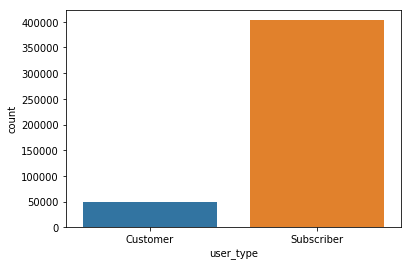

In [28]:
sb.countplot(data = df_clean, x = 'user_type')

I computed the difference by doing a simple countplot and you can see that there are almost 400,000 subscribers compared to about 50,000 customers. That is a huge difference. Now I want to see the difference in gender. 

(-1.1053923130904209,
 1.1047712970409083,
 -1.1050478256229228,
 1.1051157845084063)

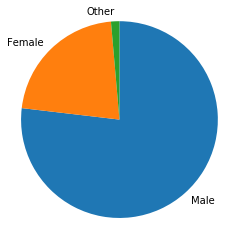

In [29]:
sorted_counts = df_clean['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
       counterclock = False);
plt.axis('square')

We can see here that most of the riders are male, followed by female and then a small percentage that are "other". Now I want to see the difference in age. 

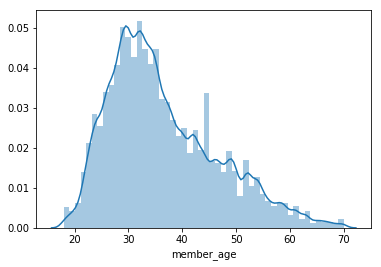

In [30]:
sb.distplot(df_clean['member_age'])

This distribution plot shows us that most of the ages range from 18 to 70. The highest number of riders seem to be between the ages 30 and 35. Now let's take a look at the daily usage of the bike share system and see which days seem to be the most popular.

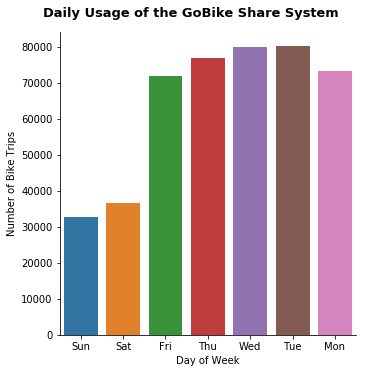

In [31]:
g = sb.catplot(data = df_clean, x ='start_time_weekday', kind='count')
g.set_axis_labels("Day of Week", "Number of Bike Trips")
g.fig.suptitle('Daily Usage of the GoBike Share System', y=1.03, fontsize=13, fontweight='bold');

So now we see that the most popular days of the week for bike rides are Monday through Friday. About half as many rides are taken on the weekend. Now lets look for the most popular times of the day.

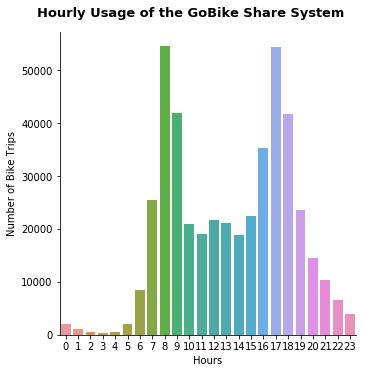

In [32]:
g = sb.catplot(data = df_clean, x ='start_time_hour', kind='count')
g.set_axis_labels("Hours", "Number of Bike Trips")
g.fig.suptitle('Hourly Usage of the GoBike Share System', y=1.03, fontsize=13, fontweight='bold');

Here we can see the most popular hours throughout the day. It shows us that the 8 o'clock and 5 o'clock (17:00) hours are the most popular for travel.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

It's sort of surprising that there aren't as many riders on the weekend. It will be interesting to see the difference between customers and subscribers and comparing that to the most popular days of the week and the most popular hours of the day.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No, all the data was tidy and no changes were made.

## Bivariate Exploration
Now we will compare customers and subscribers against different variables to figure which days and hours are most popular for each user type.

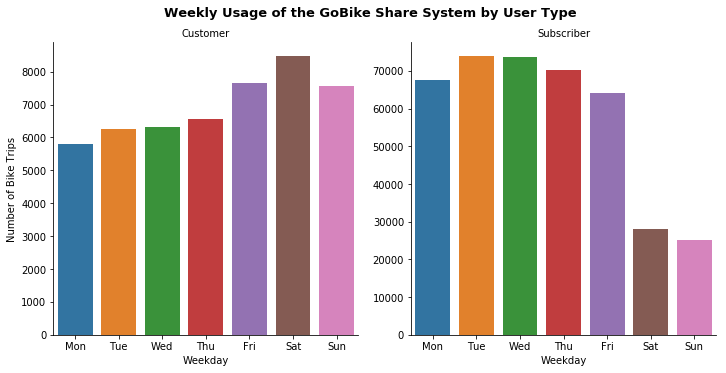

In [33]:
# Order weekdays
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False, order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Usage of the GoBike Share System by User Type', y=1.03, fontsize=13, fontweight='bold');

These plots show the difference between customers and subscribers by day of the week. It's clear that customers use the GoBike system more heavily on the weekends, specifically Friday through Sunday. In contrast, subscribers use the bike system during the weekdays significantly more than on the weekend, specifically just Saturday and Sunday. It's also important to note that customers have almost 1000 rides more on Saturdays than any day of the week for subscribers. Now let's look at the difference in hourly usage.

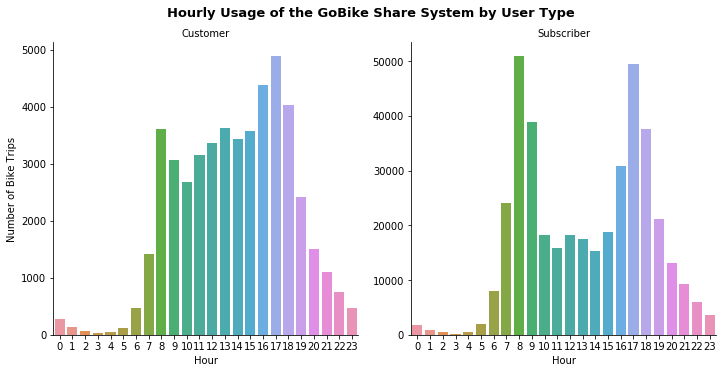

In [34]:
g = sb.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False)
g.set_axis_labels("Hour", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly Usage of the GoBike Share System by User Type', y=1.03, fontsize=13, fontweight='bold');

Here we see the difference between customers and subscribers by hour of the day. With customers, you can see that the most popular riding hours are between 8:00am and 6:00pm. In contrast, the most popular hours for subscribers are at 8:00am and 5:00pm, with the hours in between being significantly less popular.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a couple relationships that have been observed so far. First, regarding customers who use the bike share system, they tend to use it more on the weekends and throughout the day time hours. In contrast, subscribers, who account for a lot more of the dataset, are using the system more during the weekdays and the most popular hours are 8:00am and 5:00pm. This could mean that subscribers are using the bikes to go to and from work since those hours are usually the beginning and end times of business hours each day of the week. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I observed that customers have almost 1000 rides more on Saturdays than any day of the week for subscribers. 

## Multivariate Exploration

Now I will add in the factor of age for each of the plots.

In [42]:
# Create bins for age ranges
bins = [18, 30, 45, 60, np.inf]
names = ['18-29', '30-44', '45-59', '60+']

df_clean['AgeRange'] = pd.cut(df_clean['member_age'], bins, labels=names)

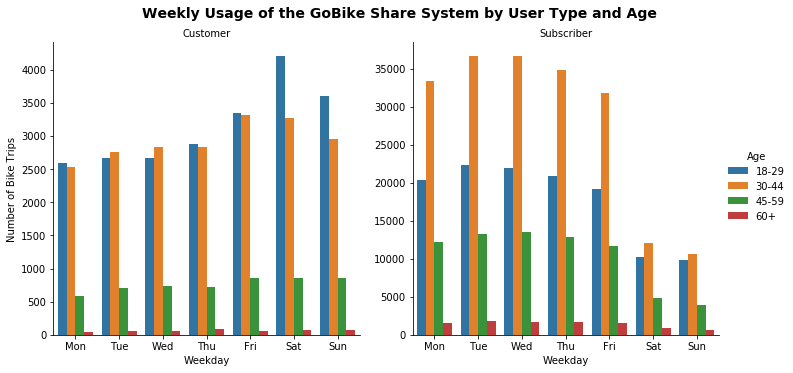

In [43]:
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='AgeRange', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g._legend.set_title('Age')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Usage of the GoBike Share System by User Type and Age', y=1.03, fontsize=14, fontweight='semibold');

These plots show us that the most popular age group for customers is 18-29 and they ride the most, every day besides Tuesday and Wednesday. The most popular age group for subscribers is 30-44 and they ride the most every day of the week. The age group that rides the least is 60+ for both customers and subscribers. Now let's look at the hourly usage of each user type categorized by age.

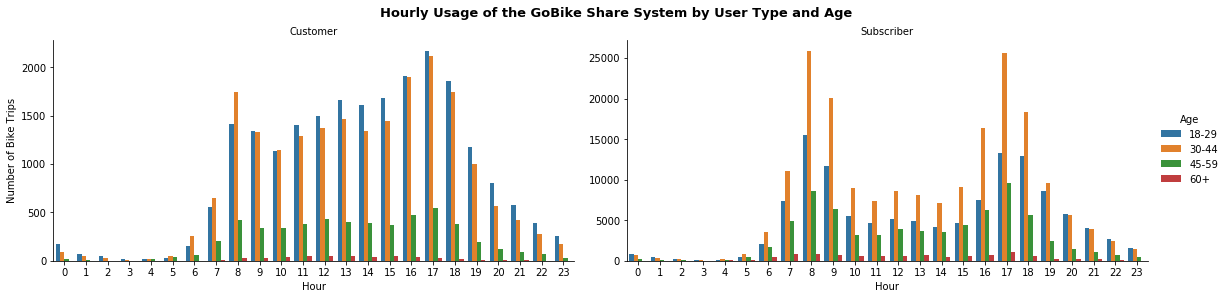

In [37]:
g = sb.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='AgeRange', kind='count', height=4, 
               aspect=2, sharey = False)
g.set_axis_labels("Hour", "Number of Bike Trips")
g._legend.set_title('Age')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly Usage of the GoBike Share System by User Type and Age', y=1.03, fontsize=13, fontweight='bold');

As we can see here, most riders during the day are between the ages of 18 and 44 for both customers and subscribers. In relation to the hourly plots from before where subscribers were riding the most at 8:00am and 5:00pm, you can see here that most of those riders are in the age group of 30-44 by at least 10,000 rides. Now let's do something different and look at the trip duration by user type and age.

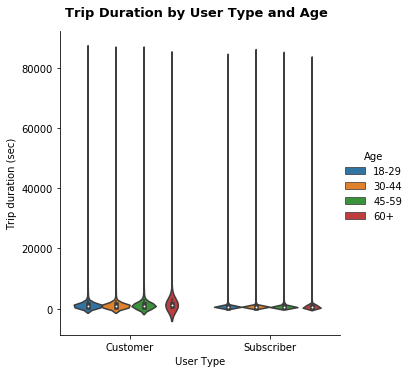

In [38]:
g = sb.catplot(data=df_clean, x='user_type', y="duration_sec", hue="AgeRange", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Age')
g.fig.suptitle('Trip Duration by User Type and Age', y=1.03, fontsize=13, fontweight='bold');

Here we can see the difference in duration of trips taken by both customers and subscribers and categorized by age groups. It's kind of difficult to tell by this plot because of the outliers.

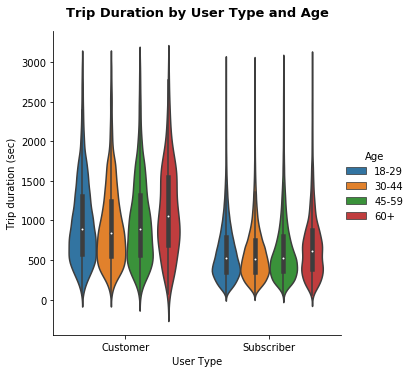

In [39]:
# Set limit at 3000 seconds
duration = df_clean.query('duration_sec < 3000')
g = sb.catplot(data=duration, x='user_type', y="duration_sec", hue="AgeRange", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Age')
g.fig.suptitle('Trip Duration by User Type and Age', y=1.03, fontsize=13, fontweight='bold');

Here is a better look at the difference between each user type and age group with the limit at 3,000 seconds. The customers seem to take longer trips overall with the 60+ category taking the longest. With subscribers, the trips all seem to be fairly the same duration, which further confirms the theory that most subscribers use the bike system to get to work whereas customers are using it for sightseeing and leisure. This is pretty interesting but let's take one last look at weekday and hourly usage of the bikes.

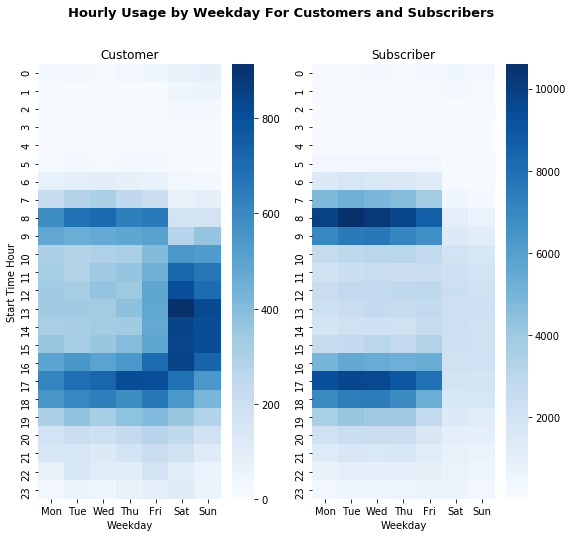

In [40]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly Usage by Weekday For Customers and Subscribers', fontsize=13, fontweight='bold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="Blues")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="Blues")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

This heatmap is just another illustration of the difference in weekdays and hours of the day between customers and subscribers. The darker areas mean a higher frequency of rides. You can see here again that customers use the bikeshare riding system the most on Saturday and Sunday and between the hours of 8:00am and 6:00pm. Subscribers use the system the most during Monday through Friday and at the 8 o'clock hour and the 5 o'clock hour.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The biggest observation made from this dataset was that most of the users are subscribers and their most frequent days of use are Monday through Friday and at 8:00am and 5:00pm. One could infer that this means subscribers are using the bikes to get to and from work since those time frames are when most people are traveling to and from work. In contrast, customers tend to use the bikes the most on the weekend and throughout the day time hours.

### Were there any interesting or surprising interactions between features?

It was surprising to see that most of the riders of both user types were between the ages of 30 and 44. I would have thought it would be the younger age group of 18-29 that would use the bikes the most. It's also interesting to note that most subscribers, who account for most of the dataset, don't really use the bikes on the weekends.

### Conclusion

I believe that this analysis answered the questions that I had about this dataset. I was able to see the difference in the amount of customers and subscribers. I was also able to see the most popular days of the week for riding for both customers and subscribers, along with the most popular hours to ride and member age. Lastly, I was able to see the difference in trip duration for both user types and age groups. 

### References

I referred to Udacity lessons, GitHub, and Stack Overflow for help to complete my anaylsis of this dataset.

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration.ipynb'])

0